In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')

In [2]:
df = pd.read_csv('Head_Size.csv')
df.columns=['Nem', 'Kor', 'FejMéret', 'AgySúly']

In [3]:
df.loc[1, 'AgySúly'] = np.nan
df.loc[4, 'AgySúly'] = np.nan
df.loc[232, 'FejMéret'] = np.nan
df.loc[233, 'FejMéret'] = np.nan

In [4]:
df

,Nem,Kor,FejMéret,AgySúly
0,1,1,4512.0,1530.0
1,1,1,3738.0,NaN
2,1,1,4261.0,1335.0
3,1,1,3777.0,1282.0
4,1,1,4177.0,NaN
...,...,...,...,...
232,2,2,NaN,1110.0
233,2,2,NaN,1215.0
234,2,2,3233.0,1104.0
235,2,2,3352.0,1170.0


In [5]:
def regr_impute(df, miből, hiányzó):
    df2 = df.dropna()
    b0 = stats.linregress(df2[miből], df2[hiányzó]).intercept
    b1 = stats.linregress(df2[miből], df2[hiányzó]).slope
    
    for i, value in enumerate(df[hiányzó]):
        if np.isnan(value):
            df.at[i, hiányzó] = b0 + df.at[i, miből]*b1

In [6]:
regr_impute(df, 'FejMéret', 'AgySúly')

In [7]:
regr_impute(df, 'AgySúly', 'FejMéret')

In [8]:
df

,Nem,Kor,FejMéret,AgySúly
0,1,1,4512.000000,1530.000000
1,1,1,3738.000000,1309.525922
2,1,1,4261.000000,1335.000000
3,1,1,3777.000000,1282.000000
4,1,1,4177.000000,1423.540494
...,...,...,...,...
232,2,2,3211.898707,1110.000000
233,2,2,3469.425291,1215.000000
234,2,2,3233.000000,1104.000000
235,2,2,3352.000000,1170.000000


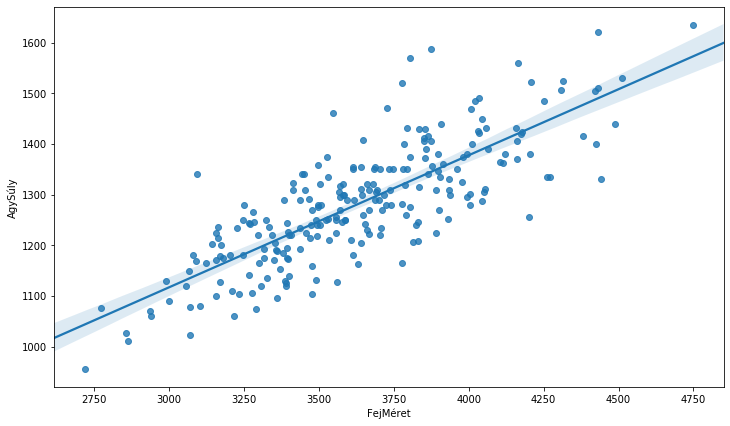

In [9]:
plt.figure(figsize=(12, 7))
sns.regplot(x=df['FejMéret'], y=df['AgySúly'])

In [10]:
stats.linregress(df['FejMéret'], df['AgySúly'])

LinregressResult(slope=0.260688599951595, intercept=334.8030837342909, rvalue=0.7996085038653056, pvalue=5.838143812145738e-54, stderr=0.012771425270949524)